<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K Nearest Neighbors

K-Nearest Neighbors (KNN) is a non-parametric, lazy learning algorithm. Its purpose is to use a dataset in which the data points are separated into several classes to predict the classification of a new sample point.

**Key Points:**


**Non-parametric:**

 KNN doesn't make any underlying assumptions about the distribution of data.


**Lazy learning:**

 Unlike other algorithms, KNN doesn't learn a discriminative function from the training data. Instead, it memorizes the training dataset.


**Distance metric:**

 KNN relies on distance metrics (like Euclidean, Manhattan, etc.) to find the k-nearest training examples to a given test example.


**Majority Voting:**

 To make a prediction for a new data point, the algorithm looks at the k nearest labeled training data points and returns the mode (most common) class label.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

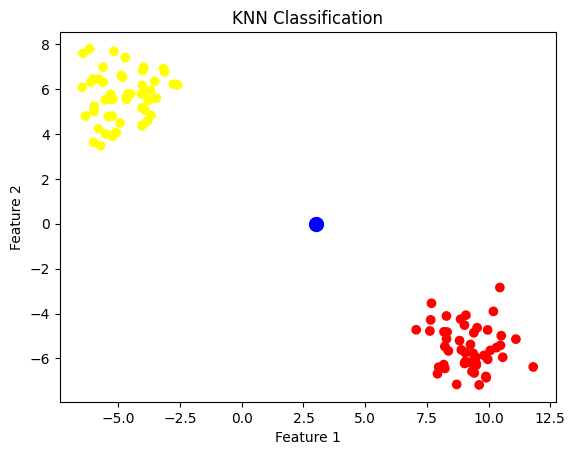

In [11]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

# Generate a random dataset of 2 clusters
X, y = make_blobs(n_samples=100, centers=2)

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Predict a new point
new_point = np.array([[3, 0]])
prediction = knn.predict(new_point)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
plt.scatter(new_point[:, 0], new_point[:, 1], color='blue', s=100, marker='o')
plt.title("KNN Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Show the plot
plt.show()


In [2]:
df = pd.read_csv("gene_expression.csv")

In [3]:
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [5]:
df["Cancer Present"].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

In [6]:
df.corr()

,Gene One,Gene Two,Cancer Present
Gene One,1.000000,-0.375427,0.545854
Gene Two,-0.375427,1.000000,-0.692352
Cancer Present,0.545854,-0.692352,1.000000


<Axes: xlabel='Gene One', ylabel='Gene Two'>

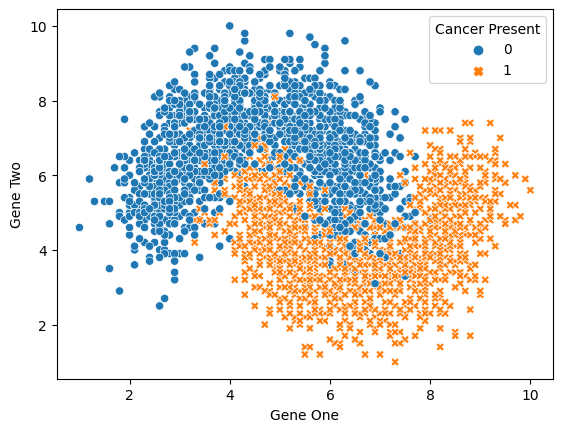

In [8]:
sns.scatterplot(data=df, x="Gene One", y="Gene Two", hue="Cancer Present", style="Cancer Present" )

<Axes: xlabel='Gene One', ylabel='Count'>

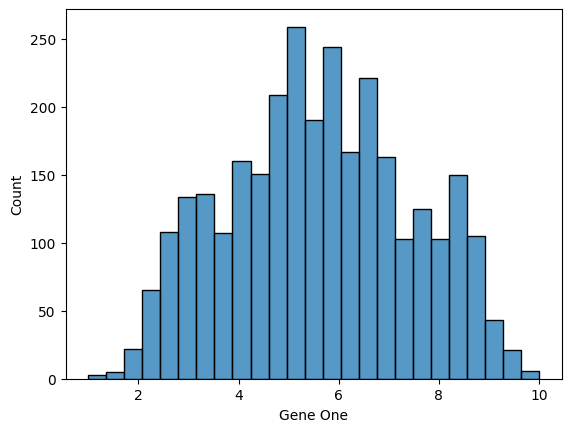

In [9]:
sns.histplot(df, x="Gene One")

<Axes: xlabel='Gene Two', ylabel='Count'>

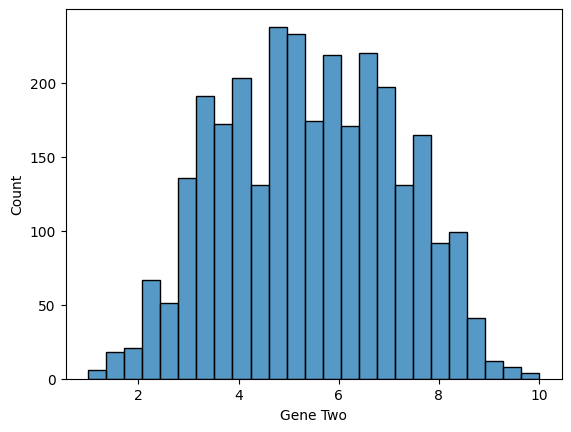

In [10]:
sns.histplot(df, x="Gene Two")

##Data Preparation

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
y = df["Cancer Present"]
X = df.drop("Cancer Present", axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

##KNN Model

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
y_preds = knn_model.predict(X_test_scaled)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
confusion_matrix(y_test, y_preds)

array([[268,  27],
       [ 36, 269]])

In [25]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       295
           1       0.91      0.88      0.90       305

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.89       600
weighted avg       0.90      0.90      0.90       600

